In [1]:
import os
from dotenv import load_dotenv 
load_dotenv()

from langchain_groq import ChatGroq
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
llm = ChatGroq(model='llama-3.1-8b-instant')
result=llm.invoke("Hello")
result

AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.014930195, 'prompt_time': 0.001678127, 'queue_time': 0.055025633, 'total_time': 0.016608322}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8a13dfab2b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8f6c2597-609d-4533-876d-b5d117333b70-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [8]:
#Nodes
def generate_character(state:State):
    """Generate character descriptions"""
    msg=llm.invoke(f"Create two character names and brief traits for a story about {state['topic']}")
    return {"characters":msg.content}

def generate_settings(state:State):
    """Generate a story setting"""
    msg = llm.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {'settings':msg.content}

def generate_premise(state:State):
    """Generate a story premise"""
    msg = llm.invoke(f"Write a one sentence premise for a story about {state['topic']}")
    return {'premises':msg.content}

def combine_element(state:State):
    """Combine characters, settings, and premise into an intro"""
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Settings : {state['settings']}\n"
        f'Premise: {state['premises']}'

    )
    return {'story_intro':msg.content}


In [9]:
graph = StateGraph(State)

graph.add_node("character",generate_character)
graph.add_node("setting",generate_settings)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_element)



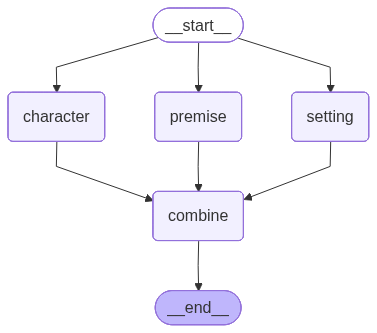

In [10]:
graph.add_edge(START,'character')
graph.add_edge(START,'setting')
graph.add_edge(START,'premise')
graph.add_edge('character','combine')
graph.add_edge('setting','combine')
graph.add_edge('premise','combine')
graph.add_edge('combine',END)

#Show the graph
compiled_graph=graph.compile()
display(Image(compiled_graph.get_graph().draw_mermaid_png()))



In [11]:
state = {'topic':'time travel'}
result = compiled_graph.invoke(state)
print(result['story_intro'])

As the fog swirled around the ancient clock tower, casting eerie shadows on the cobblestone pavement, Ethan Blackwood stumbled through the dimly lit alleyway, his eyes fixed on the dilapidated antique shop across from him. The sign creaked in the gentle breeze, beckoning him with the promise of secrets and forgotten eras. It was a place he had always avoided, yet drawn to, like a moth to flame.

Behind him, Ava Morales caught up to him, her long brown hair fluttering in the misty air. "Ethan, wait," she called out, her voice husky from the exertion of keeping pace with him. "What's going on?"

Ethan turned to her, his eyes narrowing as he studied her concerned expression. "I don't know," he admitted, his dry tone at odds with the turmoil brewing inside him. "But I think we're running out of time."

Ava's eyes widened as she followed his gaze to the clock tower. The face glowed with an otherworldly light, and the ticking of the gears seemed to grow louder, more insistent. "What's happen